In [1]:
#importing all the necccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#reading the data
data=pd.read_csv("varitey_commodity_total.csv")

In [3]:
#Getting the summary of the data by seeing the first five lines
data.head()

State   District     Market     Commodity Variety Grade Arrival_Date  \
0  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   03/01/2006   
1  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   05/01/2006   
2  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   16/01/2006   
3  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   19/01/2006   
4  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   24/01/2006   

   Min_Price  Max_Price  Modal_Price  Commodity_Code  
0      600.0     1300.0       1100.0              81  
1     1100.0     1400.0       1300.0              81  
2     1500.0     1800.0       1800.0              81  
3      700.0      900.0        800.0              81  
4      500.0     1400.0       1000.0              81

In [4]:
#getting the null values of the data
data.isnull().sum()


State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64

In [5]:
#converting the data column to datetime
data['Arrival_Date'] = pd.to_datetime(data['Arrival_Date'], dayfirst=True)

Since there are no missing data points in our datasets, we dont need to treat our missing data using imputation

In [6]:
#getting the info about the columns of the data uby finding the datatypes and the non null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320323 entries, 0 to 320322
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   State           320323 non-null  object        
 1   District        320323 non-null  object        
 2   Market          320323 non-null  object        
 3   Commodity       320323 non-null  object        
 4   Variety         320323 non-null  object        
 5   Grade           320323 non-null  object        
 6   Arrival_Date    320323 non-null  datetime64[ns]
 7   Min_Price       320323 non-null  float64       
 8   Max_Price       320323 non-null  float64       
 9   Modal_Price     320323 non-null  float64       
 10  Commodity_Code  320323 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 26.9+ MB


In [7]:
commodity_counts=pd.DataFrame(data['Commodity'].value_counts())


Since there a lot of commmodities and a lot of them have value counts as low as 1 or2 hence removing the commodities with the count less than 500

In [8]:
# Calculate the value counts for the 'Commodity' column
value_counts = data['Commodity'].value_counts()

# Filter the dataset to keep only rows where the 'Commodity' count is 100 or more
data_cleaned = data[data['Commodity'].isin(value_counts[value_counts >= 500].index)]



In [9]:
data_cleaned['Commodity'].value_counts()

Commodity
Potato                          14175
Onion                            9700
Wheat                            8756
Tomato                           7855
Brinjal                          7597
                                ...  
Bajra(Pearl Millet/Cumbu)         658
Seetapal                          652
Mustard                           606
Sesamum(Sesame,Gingelly,Til)      566
Jowar(Sorghum)                    514
Name: count, Length: 75, dtype: int64

In [10]:
data_grouped = data_cleaned.copy()
categories = {
    'Leafy Greens': [
        'Coriander(Leaves)', 'Methi(Leaves)', 'Amaranthus', 'Spinach', 'Mint(Pudina)', 
        'Leafy Vegetable', 'Onion Green'
    ],
    'Root Vegetables': [
        'Carrot', 'Radish', 'Sweet Potato', 'Beetroot', 'Yam (Ratalu)', 
        'Elephant Yam (Suran)', 'Turnip'
    ],
    'Gourds': [
        'Bitter gourd', 'Bottle gourd', 'Sponge gourd', 'Little gourd (Kundru)', 
        'Snakeguard', 'Pointed gourd (Parval)', 'Round gourd (Tinda)', 'Pumpkin'
    ],
    'Pods/Beans': [
        'Surat Beans (Papadi)', 'French Beans (Frasbean)', 'Cluster beans', 
        'Peas Wet', 'Cowpea(Veg)', 'Guar', 'Pegeon Pea (Arhar Fali)'
    ],
    'Alliums': [
        'Onion', 'Onion Green'
    ],
    'Tubers': [
        'Potato', 'Colacasia'
    ],
    'Chillies and Peppers': [
        'Chilly Capsicum', 'Green Chilli', 'Capsicum'
    ],
    'Other Vegetables': [
        'Tomato', 'Brinjal', 'Cauliflower', 'Cabbage', 'Drumstick', 
        'Ginger(Green)', 'Rat Tail Radish (Mogari)', 'Tinda', 'Papaya (Raw)'
    ],
    'Fruits': [
        'Amla(Nelli Kai)', 'Banana - Green', 'Banana', 'Apple', 'Orange', 
        'Pomegranate', 'Grapes', 'Chikoos(Sapota)', 'Papaya', 'Mango', 
        'Seetapal', 'Pineapple', 'Mousambi(Sweet Lime)', 'Water Melon', 
        'Cherry', 'Kinnow', 'Plum', 'Karbuja(Musk Melon)', 'Peach', 'Litchi', 
        'Guava', 'Ber(Zizyphus/Borehannu)', 'Jamun(Narale Hannu)'
    ],
    'Pulses': [
        'Black Gram (Urd Beans)(Whole)', 'Green Gram (Moong)(Whole)', 'Peas Wet', 
        'Pigeon Pea (Arhar)', 'Bengal Gram(Gram)(Whole)', 'Arhar Dal(Tur Dal)', 
        'Red Gram', 'Other Pulses', 'Moath Dal'
    ],
    'Grains': [
        'Wheat', 'Paddy(Dhan)(Common)', 'Bajra(Pearl Millet/Cumbu)', 
        'Jowar(Sorghum)', 'Barley (Jau)', 'Ragi (Finger Millet)', 'Rice'
    ],
    'Seeds': [
        'Cotton Seed', 'Corriander seed', 'Ajwan', 'Isabgul (Psyllium)', 
        'Guar Seed(Cluster Beans Seed)', 'Suva (Dill Seed)', 'Cummin Seed(Jeera)'
    ],
    'Oilseeds': [
        'Castor Seed', 'Sesamum(Sesame,Gingelly,Til)', 'Mustard', 'Binoula'
    ],
    'Spices': [
        'Turmeric (raw)', 'Methi Seeds'
    ],
    'Other Agricultural Products': [
        'Groundnut pods (raw)', 'Tobacco', 'Castor Oil'
    ]
}

def assign_category(commodity):
    for category, items in categories.items():
        if commodity in items:
            return category
    return 'Uncategorized'  

data_grouped['Category'] = data_grouped['Commodity'].apply(assign_category)


In [11]:
data_grouped.head()


State   District     Market     Commodity Variety Grade Arrival_Date  \
0  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-03   
1  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-05   
2  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-16   
3  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-19   
4  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-24   

   Min_Price  Max_Price  Modal_Price  Commodity_Code Category  
0      600.0     1300.0       1100.0              81   Gourds  
1     1100.0     1400.0       1300.0              81   Gourds  
2     1500.0     1800.0       1800.0              81   Gourds  
3      700.0      900.0        800.0              81   Gourds  
4      500.0     1400.0       1000.0              81   Gourds

In [12]:
data_grouped['Category'].unique()

array(['Gourds', 'Leafy Greens', 'Pods/Beans', 'Uncategorized',
       'Other Vegetables', 'Alliums', 'Root Vegetables', 'Tubers',
       'Spices', 'Chillies and Peppers', 'Fruits',
       'Other Agricultural Products', 'Grains', 'Pulses', 'Oilseeds',
       'Seeds'], dtype=object)

In [13]:
data_grouped['Grade'].unique()

array(['FAQ', 'Small', 'Medium', 'Large'], dtype=object)

In [14]:
data_grouped['Variety'].unique()

array(['Other', 'Kufri Giriraj', 'Capsicum', 'Bold', 'Coriander', 'Chips',
       'Desi', 'Jalander', 'Local', 'Nasik', 'Hapus(Alphaso)', 'Keshar',
       'Deshi', 'Milbar', 'White', 'Basumathi', 'I.R. 8', 'Masuri',
       'Castor seed', 'Assam Comilla', 'Shanker 6 (B) 30mm FIne',
       'V-797 22mm FIne', 'Black', 'Shanker 4 31mm FIne', 'Lokwan Gujrat',
       'G. R. 11', 'Gram Raw(Chholia)', 'Brinjal', 'Seethaphal',
       'Cucumbar', 'Sapota', 'Onion Green', 'Water Melon',
       'Banana - Green', 'Mint(Pudina)', 'Arhar (Whole)', 'Moath (W)',
       'Big 100 Kg', '777 New Ind', 'Lokwan', 'Moath Dal', 'Kalyan',
       'Mustard', 'Cummin Seed(Jeera)', 'H.D.', '147 Average',
       'Arhar Dal(Tur)', 'Sharbati', 'Paddy', 'Dehradun', 'Dara',
       'A-51-9 24mm. FIne'], dtype=object)

## Visualizing various commodities and how do they correlate with each other

In [16]:
import networkx as nx
import plotly.express as px  # Import plotly.express correctly
import plotly.graph_objects as go
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

C:\Users\Shreshtha\AppData\Local\Temp\ipykernel_12256\3302686186.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab20", len(categories))  # Use a colormap with distinct colors


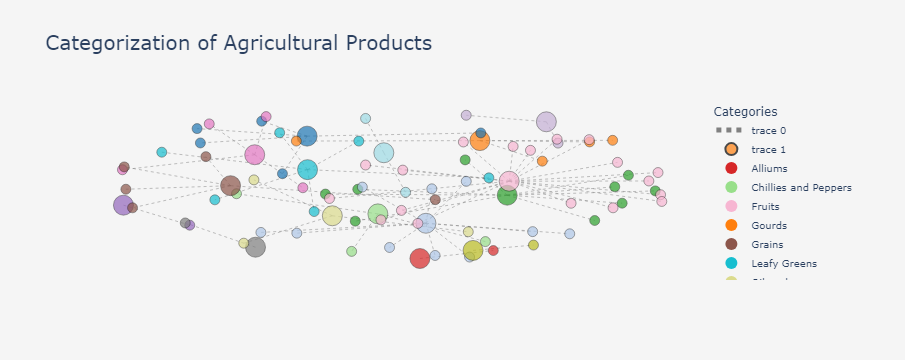

In [17]:
# Step 1: Create the graph
G = nx.Graph()

# Add nodes and edges
for _, row in data_grouped.iterrows():
    commodity = row['Commodity']
    category = row['Category']
    G.add_node(category, group="Category")  # Add category as a node
    G.add_node(commodity, group="Commodity", category=category)  # Add commodity with a category attribute
    G.add_edge(category, commodity)  # Connect commodity to its category

# Step 2: Generate positions using Fruchterman-Reingold layout
pos = nx.spring_layout(G, k=0.5, seed=42)

# Step 3: Prepare data for Plotly
edge_x = []
edge_y = []

# For edges
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  # Add x-coordinates for the edge
    edge_y.extend([y0, y1, None])  # Add y-coordinates for the edge

# For nodes
node_x = []
node_y = []
node_text = []  # Hover information
node_colors = []  # Node colors

# Generate a unique color for each category
categories = {node for node in G.nodes if G.nodes[node].get("group") == "Category"}
cmap = cm.get_cmap("tab20", len(categories))  # Use a colormap with distinct colors
color_mapping = {category: mcolors.rgb2hex(cmap(i)[:3]) for i, category in enumerate(categories)}

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    if G.nodes[node]["group"] == "Category":
        node_text.append(f"Category: {node}")  # Hover text for categories
        node_colors.append(color_mapping[node])  # Assign unique colors to categories
    else:
        category = G.nodes[node].get("category")
        node_text.append(f"Commodity: {node}")  # Hover text for commodities
        node_colors.append(color_mapping[category])  # Assign the same color as the category

# Step 4: Create the plot
fig = go.Figure()

# Add edges with dotted lines
fig.add_trace(
    go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=0.5, color="gray", dash="dot"),  # Dotted line style
        hoverinfo="none",
        mode="lines"
    )
)

# Add nodes with larger sizes
fig.add_trace(
    go.Scatter(
        x=node_x,
        y=node_y,
        mode="markers",
        hovertext=node_text,  # Hover text for both categories and commodities
        hoverinfo="text",
        marker=dict(
            size=[20 if G.nodes[node]["group"] == "Category" else 10 for node in G.nodes()],  # Larger node sizes
            color=node_colors,
            line=dict(color="black", width=0.5)
        ),
    )
)

# Add a legend
legend_elements = [
    go.Scatter(
        x=[None], y=[None],
        mode="markers",
        marker=dict(size=10, color=color_mapping[category]),
        name=category
    )
    for category in sorted(categories)
]
for element in legend_elements:
    fig.add_trace(element)

# Customize layout
fig.update_layout(
    title="Categorization of Agricultural Products",
    title_font_size=20,
    showlegend=True,
    legend=dict(title="Categories", font_size=10, itemsizing="constant"),
    paper_bgcolor="#f5f5f5",  # Light gray background
    plot_bgcolor="#f5f5f5",
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    dragmode="pan",  # Enable dragging for better navigation
)

# Show the interactive plot
fig.show()


In [18]:
data_grouped['Arrival_Date'] = pd.to_datetime(data_grouped['Arrival_Date'])
data_grouped['Year'] = data_grouped['Arrival_Date'].dt.year
data_grouped.head()


State   District     Market     Commodity Variety Grade Arrival_Date  \
0  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-03   
1  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-05   
2  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-16   
3  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-19   
4  Gujarat  Ahmedabad  Ahmedabad  Bitter gourd   Other   FAQ   2006-01-24   

   Min_Price  Max_Price  Modal_Price  Commodity_Code Category  Year  
0      600.0     1300.0       1100.0              81   Gourds  2006  
1     1100.0     1400.0       1300.0              81   Gourds  2006  
2     1500.0     1800.0       1800.0              81   Gourds  2006  
3      700.0      900.0        800.0              81   Gourds  2006  
4      500.0     1400.0       1000.0              81   Gourds  2006

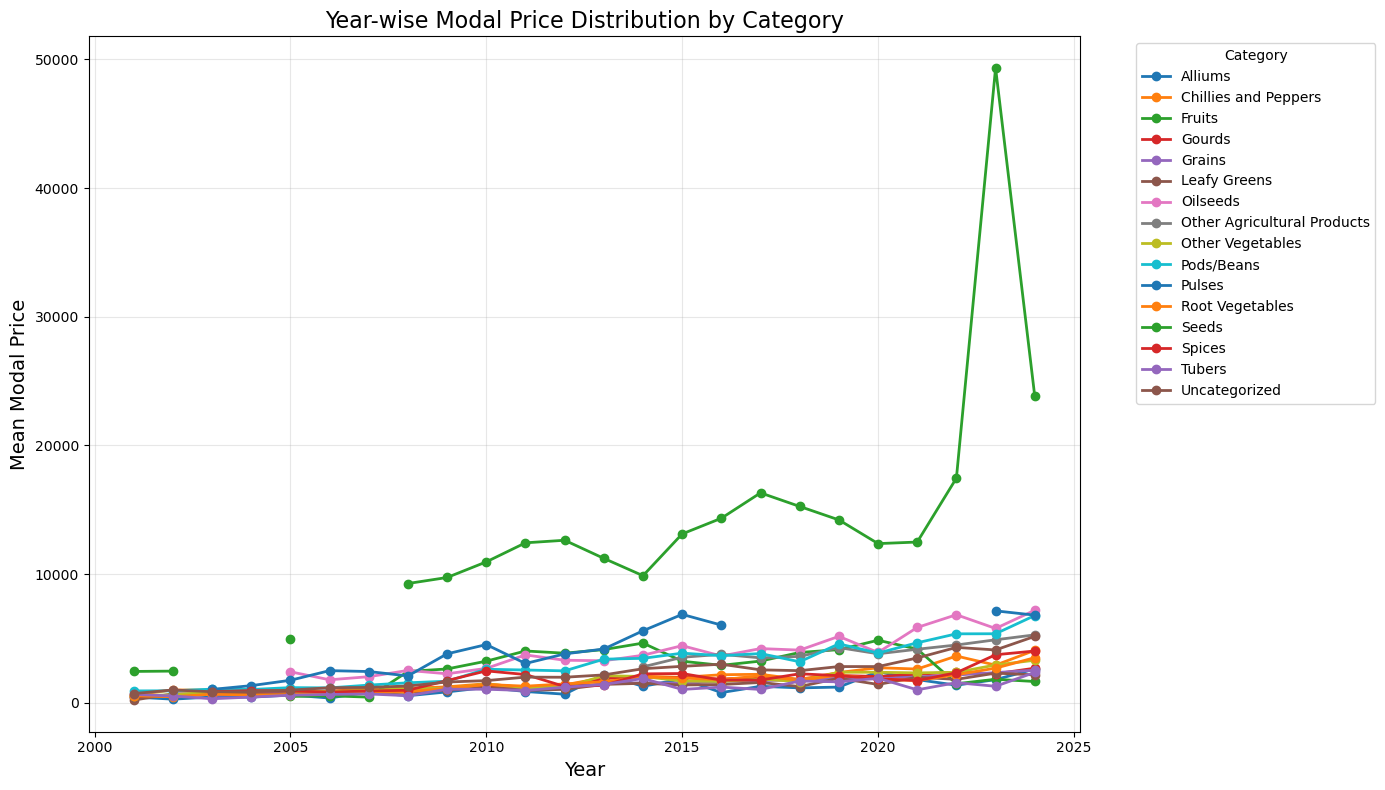

<Figure size 640x480 with 0 Axes>

In [35]:
# Group by 'Year' and 'Category' and calculate the mean modal price
grouped_data = data_grouped.groupby(['Year', 'Category'])['Modal_Price'].mean().reset_index()

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Year', columns='Category', values='Modal_Price')

# Plot the data
plt.figure(figsize=(14, 8))

for category in pivot_data.columns:
    plt.plot(
        pivot_data.index, 
        pivot_data[category], 
        label=category, 
        marker='o', 
        linewidth=2
    )

# Add labels, legend, and title
plt.title('Year-wise Modal Price Distribution by Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Modal Price', fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('year-wisepriceall', format='png', dpi=300)


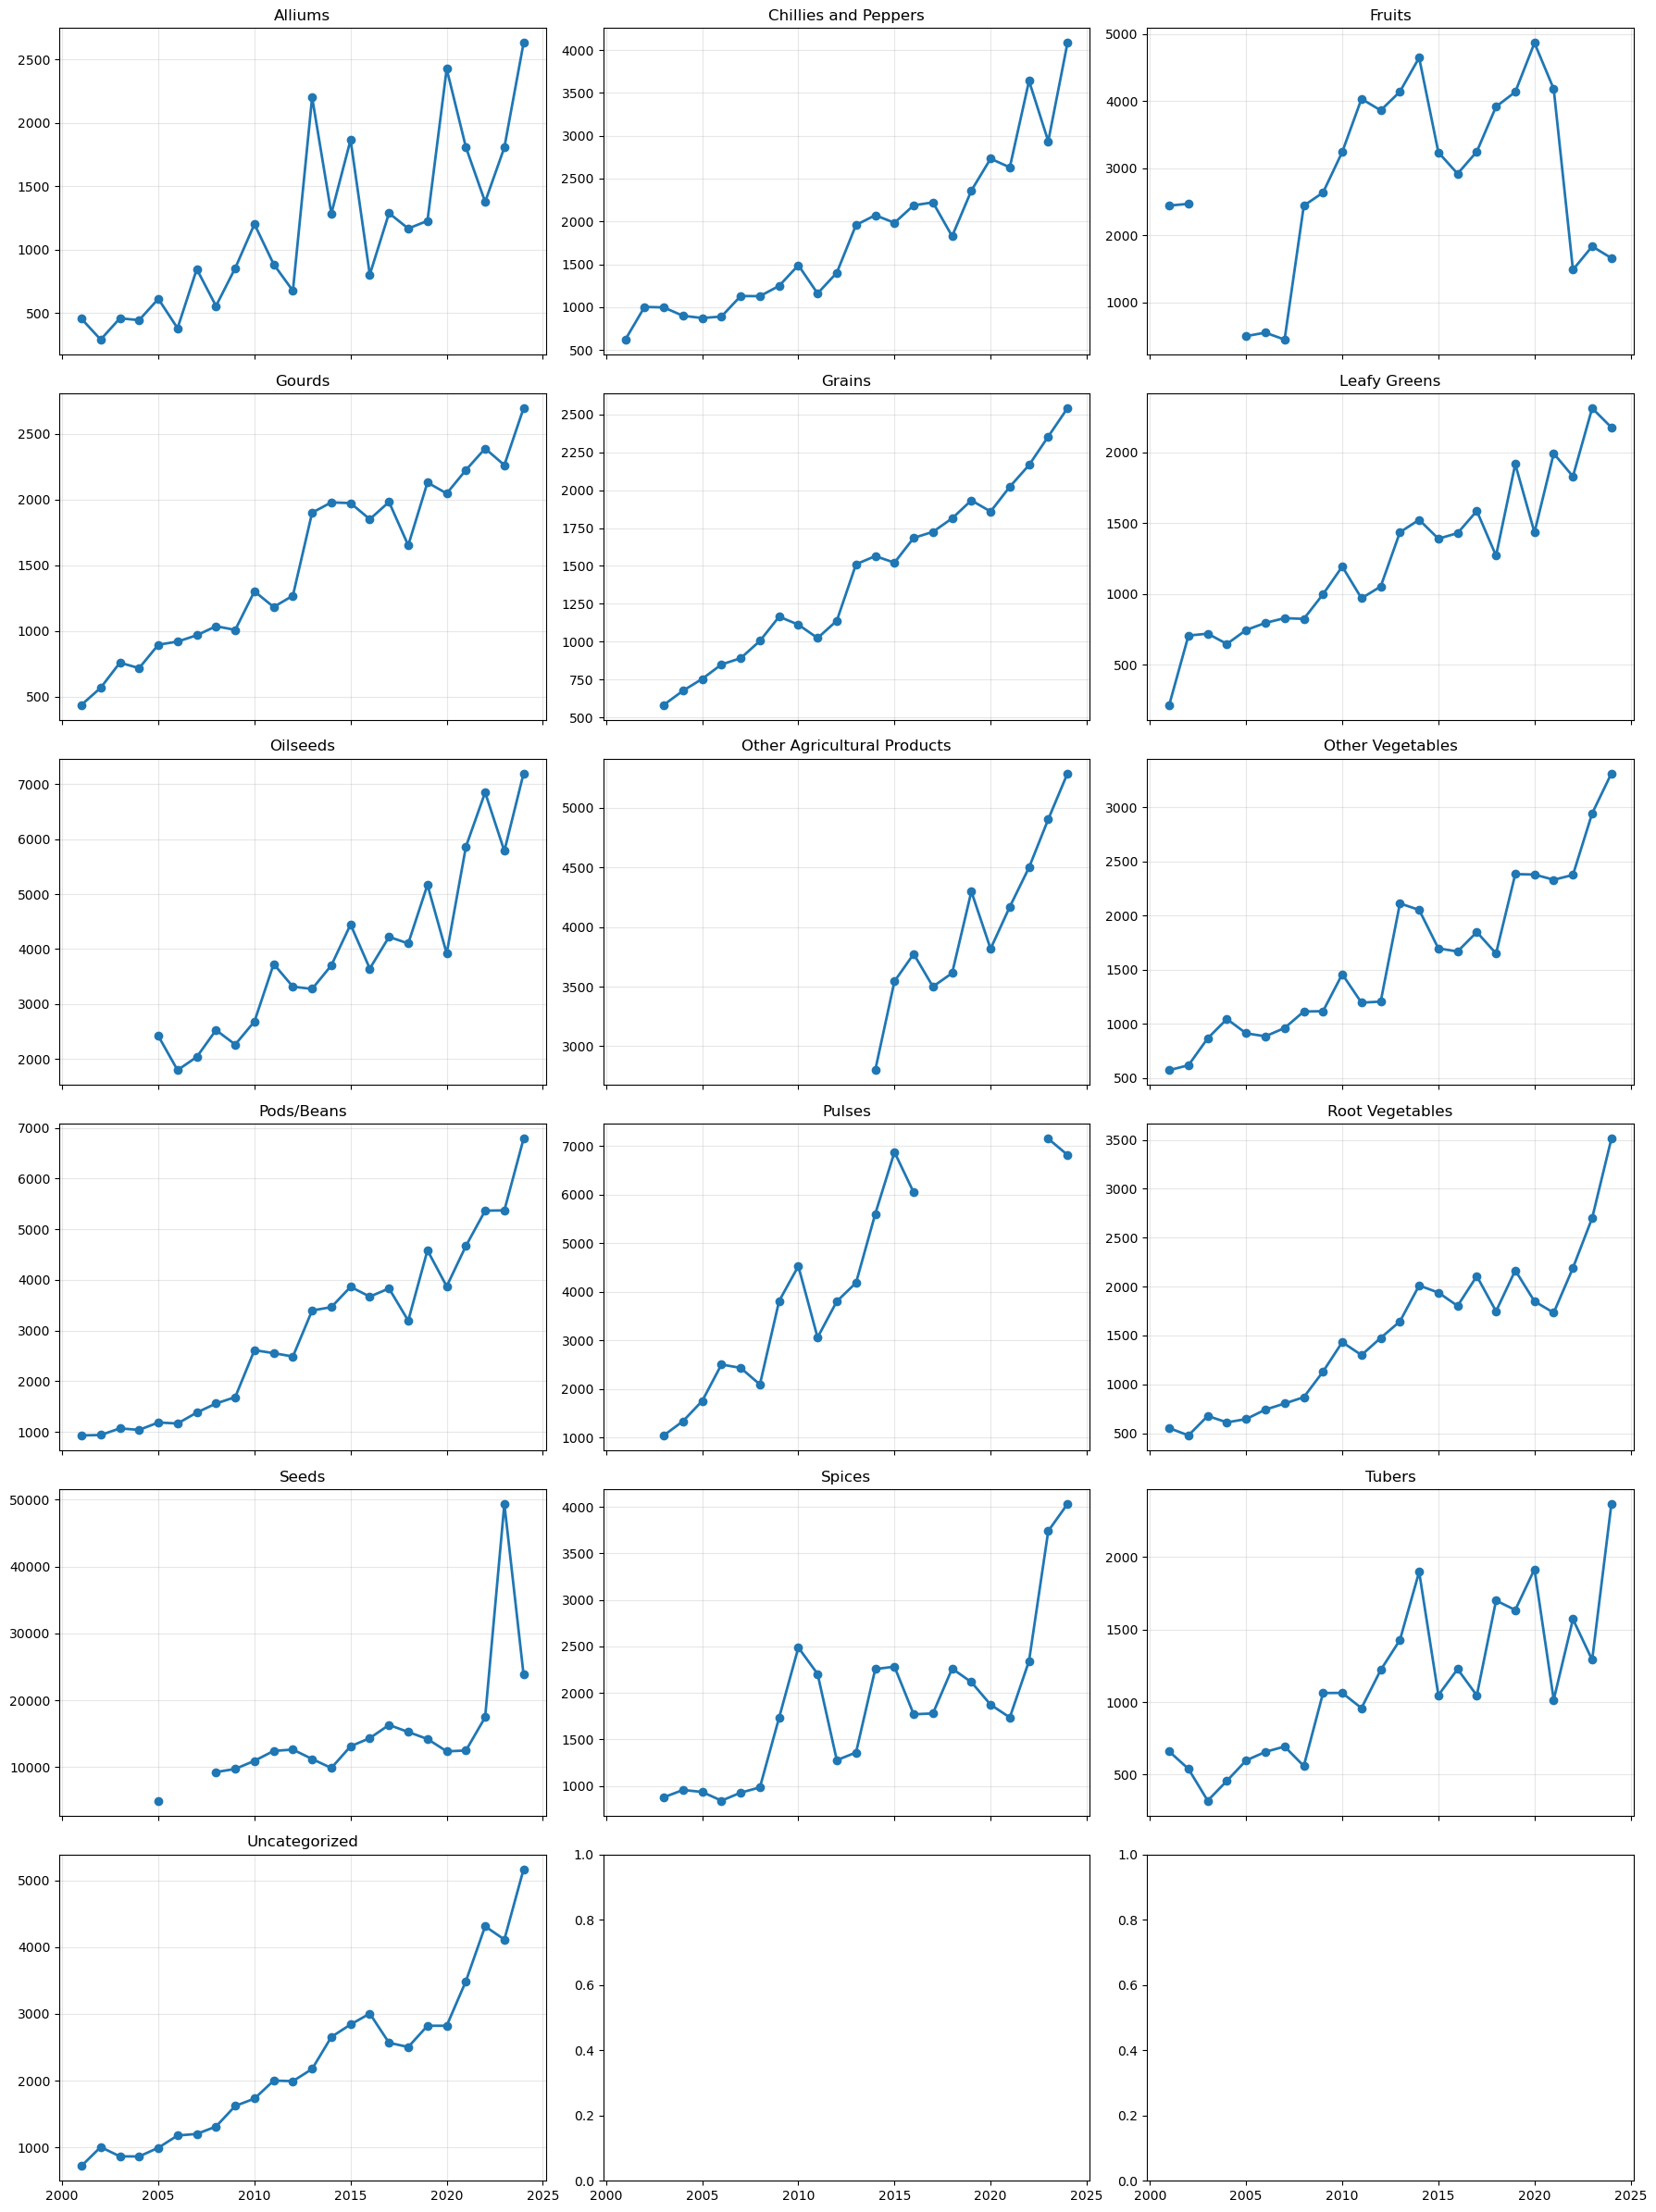

<Figure size 640x480 with 0 Axes>

In [36]:
num_categories = len(pivot_data.columns)
rows = (num_categories // 3) + 1  # 3 categories per row

fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4), sharex=True)
axes = axes.flatten()

for i, category in enumerate(pivot_data.columns):
    axes[i].plot(pivot_data.index, pivot_data[category], marker='o', linewidth=2)
    axes[i].set_title(category, fontsize=12)
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()
plt.savefig('pairplot_for_all.png', format='png', dpi=300)

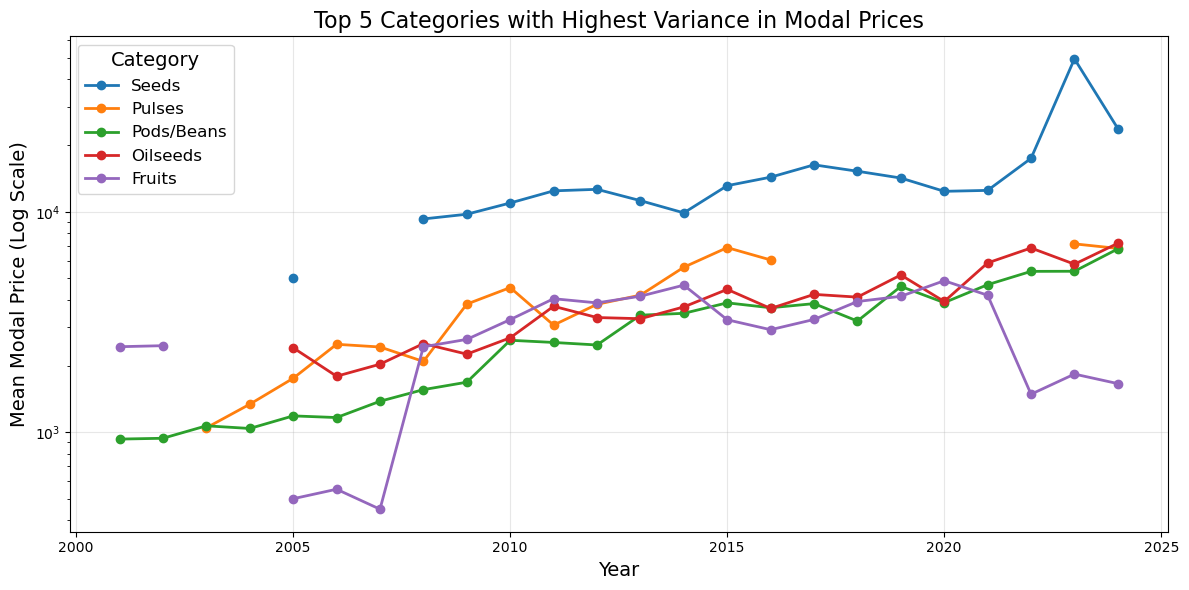

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(12, 6))

category_variances = pivot_data.var().sort_values(ascending=False)

# Select the top 5 categories with the highest variance
high_variance_categories = category_variances.head(5).index
for category in high_variance_categories:
    plt.plot(
        pivot_data.index, 
        pivot_data[category], 
        label=category, 
        marker='o', 
        linewidth=2
    )

# Add title, axis labels, and legend
plt.title('Top 5 Categories with Highest Variance in Modal Prices', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Modal Price (Log Scale)', fontsize=14)
plt.yscale('log')  # Apply logarithmic scale
plt.legend(title='Category', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('cat_with_high_var', format='png', dpi=300)


In [22]:
data['Market'].unique()

array(['Ahmedabad', 'Ahmedabad(Chimanbhai Patal Market Vasana)',
       'Ahmedabad(Fruit Market, Naroda)', 'Ahmedabad(Manekchowk)',
       'Ahmedabad(Rajnagar sub yard)', 'Bavla', 'Dhandhuka', 'Dholka',
       'Dholka(Koth)', 'Dholka(Market Yard Veg)', 'Mandal', 'Rampura',
       'Ranpur', 'Sanad', 'Viramgam'], dtype=object)

In [23]:
from geopy.geocoders import Nominatim

# List of markets
markets = [
    'Ahmedabad', 'Ahmedabad(Chimanbhai Patal Market Vasana)',
    'Ahmedabad(Fruit Market, Naroda)', 'Ahmedabad(Manekchowk)',
    'Ahmedabad(Rajnagar sub yard)', 'Bavla', 'Dhandhuka', 'Dholka',
    'Dholka(Koth)', 'Dholka(Market Yard Veg)', 'Mandal', 'Rampura',
    'Ranpur', 'Sanad', 'Viramgam'
]

# Initialize geolocator
geolocator = Nominatim(user_agent="market_locator")

# Fetch coordinates
market_coordinates = []
for market in markets:
    try:
        location = geolocator.geocode(market + ", Gujarat, India")
        if location:
            market_coordinates.append({
                'Market': market,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            market_coordinates.append({'Market': market, 'Latitude': None, 'Longitude': None})
    except Exception as e:
        market_coordinates.append({'Market': market, 'Latitude': None, 'Longitude': None})
        print(f"Error for {market}: {e}")

# Convert to DataFrame
coordinates_df = pd.DataFrame(market_coordinates)



In [24]:
loc=pd.read_csv('markets_with_lat_long - Copy.csv')

In [25]:
print(loc)

                                       Market   Latitude  Longitude
0                                   Ahmedabad  23.021537  72.580057
1   Ahmedabad(Chimanbhai Patal Market Vasana)  22.997379  72.536105
2             Ahmedabad(Fruit Market, Naroda)  23.050968  72.625644
3                       Ahmedabad(Manekchowk)  23.023314  72.590349
4                Ahmedabad(Rajnagar sub yard)  23.022417  72.584326
5                                       Bavla  22.827886  72.368474
6                                   Dhandhuka  22.381636  71.979141
7                                      Dholka  22.726607  72.441186
8                                Dholka(Koth)  22.637777  72.301774
9                     Dholka(Market Yard Veg)  22.719351  72.438320
10                                     Mandal  23.288383  71.917885
11                                    Rampura  23.869501  72.018972
12                                     Ranpur  22.359886  71.716908
13                                      Sanad  2

In [26]:
merged_data = pd.merge(data_grouped, loc, on='Market')
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Display the merged DataFrame
print(merged_data)


          State   District     Market           Commodity      Variety Grade  \
0       Gujarat  Ahmedabad  Ahmedabad        Bitter gourd        Other   FAQ   
1       Gujarat  Ahmedabad  Ahmedabad        Bitter gourd        Other   FAQ   
2       Gujarat  Ahmedabad  Ahmedabad        Bitter gourd        Other   FAQ   
3       Gujarat  Ahmedabad  Ahmedabad        Bitter gourd        Other   FAQ   
4       Gujarat  Ahmedabad  Ahmedabad        Bitter gourd        Other   FAQ   
...         ...        ...        ...                 ...          ...   ...   
317803  Gujarat  Ahmedabad   Viramgam         Castor Seed  Castor seed   FAQ   
317804  Gujarat  Ahmedabad   Viramgam         Castor Seed  Castor seed   FAQ   
317805  Gujarat  Ahmedabad   Viramgam  Cummin Seed(Jeera)        Other   FAQ   
317806  Gujarat  Ahmedabad   Viramgam  Cummin Seed(Jeera)        Other   FAQ   
317807  Gujarat  Ahmedabad   Viramgam  Cummin Seed(Jeera)        Other   FAQ   

       Arrival_Date  Min_Price  Max_Pri

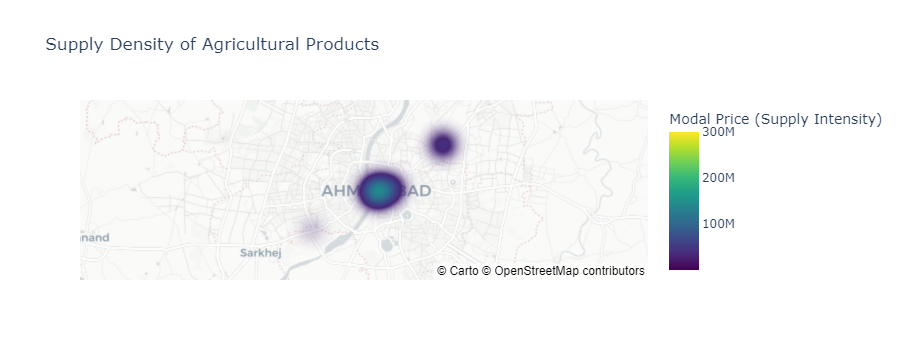

In [27]:

aggregated_data = merged_data.groupby(['Market', 'Latitude', 'Longitude'], as_index=False)['Modal_Price'].sum()

# Plotting the density map using px.density_mapbox
fig = px.density_mapbox(aggregated_data, 
                        lat="Latitude", 
                        lon="Longitude", 
                        z="Modal_Price",  
                        color_continuous_scale="Viridis", 
                        title="Supply Density of Agricultural Products")


fig.update_layout(mapbox_style="carto-positron", 
                  mapbox_center={"lat": 23.0225, "lon": 72.5715},  
                  mapbox_zoom=10, 
                  coloraxis_colorbar_title="Modal Price (Supply Intensity)")

fig.show()


C:\Users\Shreshtha\AppData\Local\Temp\ipykernel_12256\4174621080.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




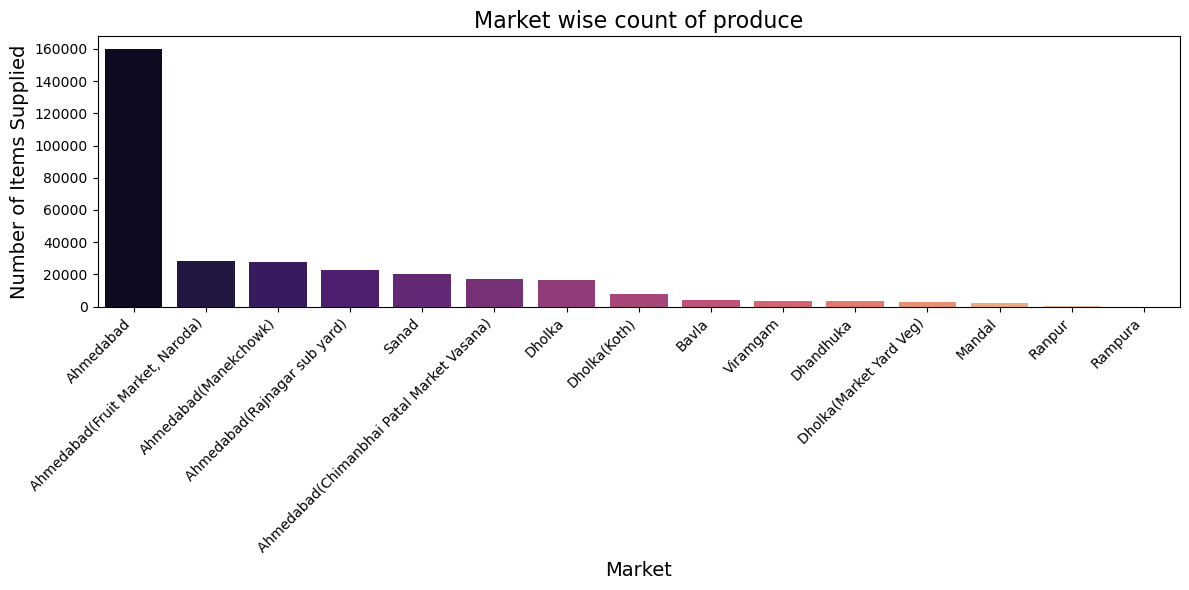

<Figure size 640x480 with 0 Axes>

In [38]:
# Grouping data by market and counting the number of items supplied
market_counts = merged_data.groupby('Market', as_index=False).size()

# Sorting the markets by count for better visualization
market_counts = market_counts.sort_values(by='size', ascending=False)

# Plotting the count plot
plt.figure(figsize=(12, 6))
sns.barplot(data=market_counts, x='Market', y='size', palette='magma')
plt.title('Market wise count of produce', fontsize=16)
plt.xlabel('Market', fontsize=14)
plt.ylabel('Number of Items Supplied', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotating market names for better readability
plt.tight_layout()
plt.show()


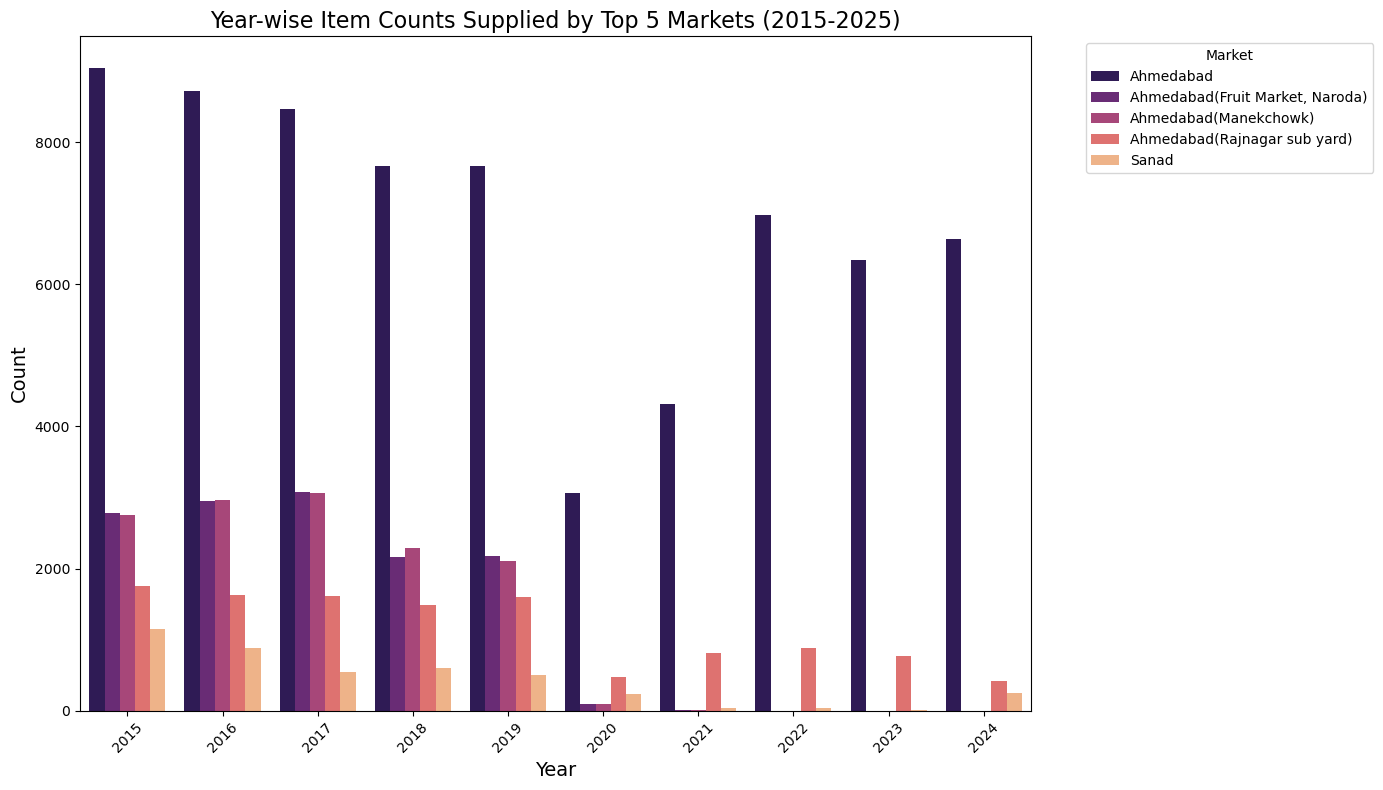

<Figure size 640x480 with 0 Axes>

In [39]:
merged_data.columns = merged_data.columns.str.strip()

# Group by Year and Market, calculate counts
market_yearly_counts = merged_data.groupby(['Year', 'Market']).size().reset_index(name='Count')

# Calculate total counts for each market
total_market_counts = market_yearly_counts.groupby('Market')['Count'].sum().reset_index()

# Identify the top 3 markets with the highest counts
top_markets = total_market_counts.nlargest(5, 'Count')['Market']

# Filter data to include only the top 3 markets
filtered_market_yearly_counts = market_yearly_counts[
    (market_yearly_counts['Year'] >= 2015) & 
    (market_yearly_counts['Year'] <= 2025) &
    (market_yearly_counts['Market'].isin(top_markets))
]

# Plotting the barplot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_market_yearly_counts,
    x='Year',
    y='Count',
    hue='Market',
    palette='magma'
)

# Adding title and labels
plt.title('Year-wise Item Counts Supplied by Top 5 Markets (2015-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


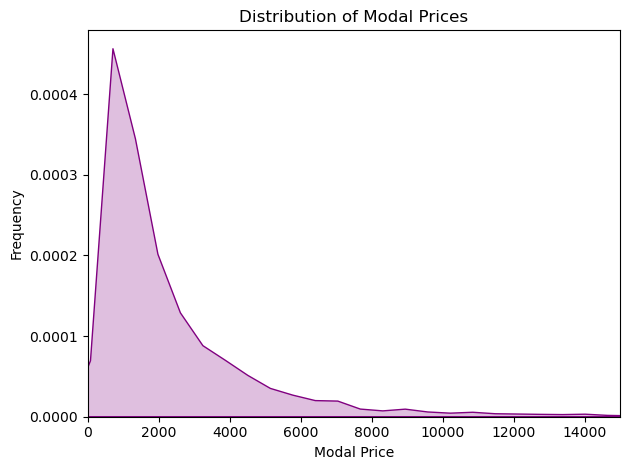

<Figure size 640x480 with 0 Axes>

In [40]:
sns.kdeplot(merged_data['Modal_Price'],fill=True,color='Purple')

# Clipping the x-axis scale
plt.xlim(0, 15000)  # This will set the x-axis limit from 0 to 20000

# Adding title and labels (optional)
plt.title('Distribution of Modal Prices')
plt.xlabel('Modal Price')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()


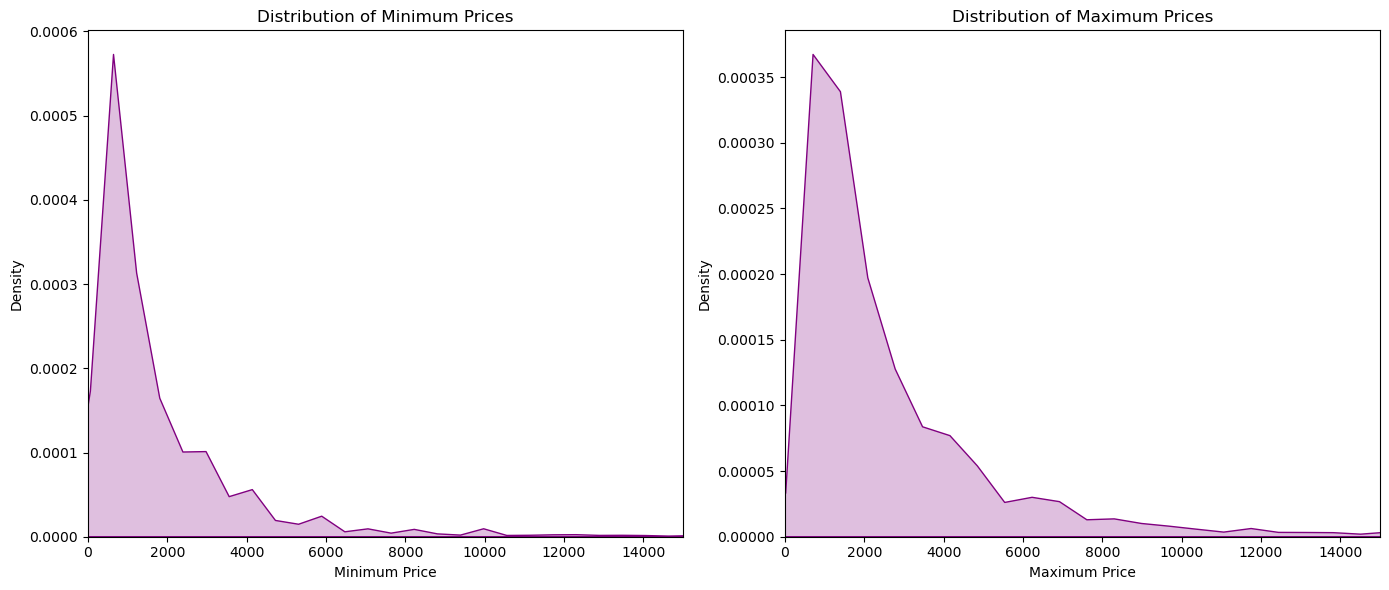

<Figure size 640x480 with 0 Axes>

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KDE plot for Min Price in the first column
sns.kdeplot(merged_data['Min_Price'], fill=True, color='Purple', ax=axes[0])
axes[0].set_xlim(0, 15000)
axes[0].set_title('Distribution of Minimum Prices')
axes[0].set_xlabel('Minimum Price')
axes[0].set_ylabel('Density')

# KDE plot for Max Price in the second column
sns.kdeplot(merged_data['Max_Price'], fill=True, color='Purple', ax=axes[1])
axes[1].set_xlim(0, 15000)
axes[1].set_title('Distribution of Maximum Prices')
axes[1].set_xlabel('Maximum Price')
axes[1].set_ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


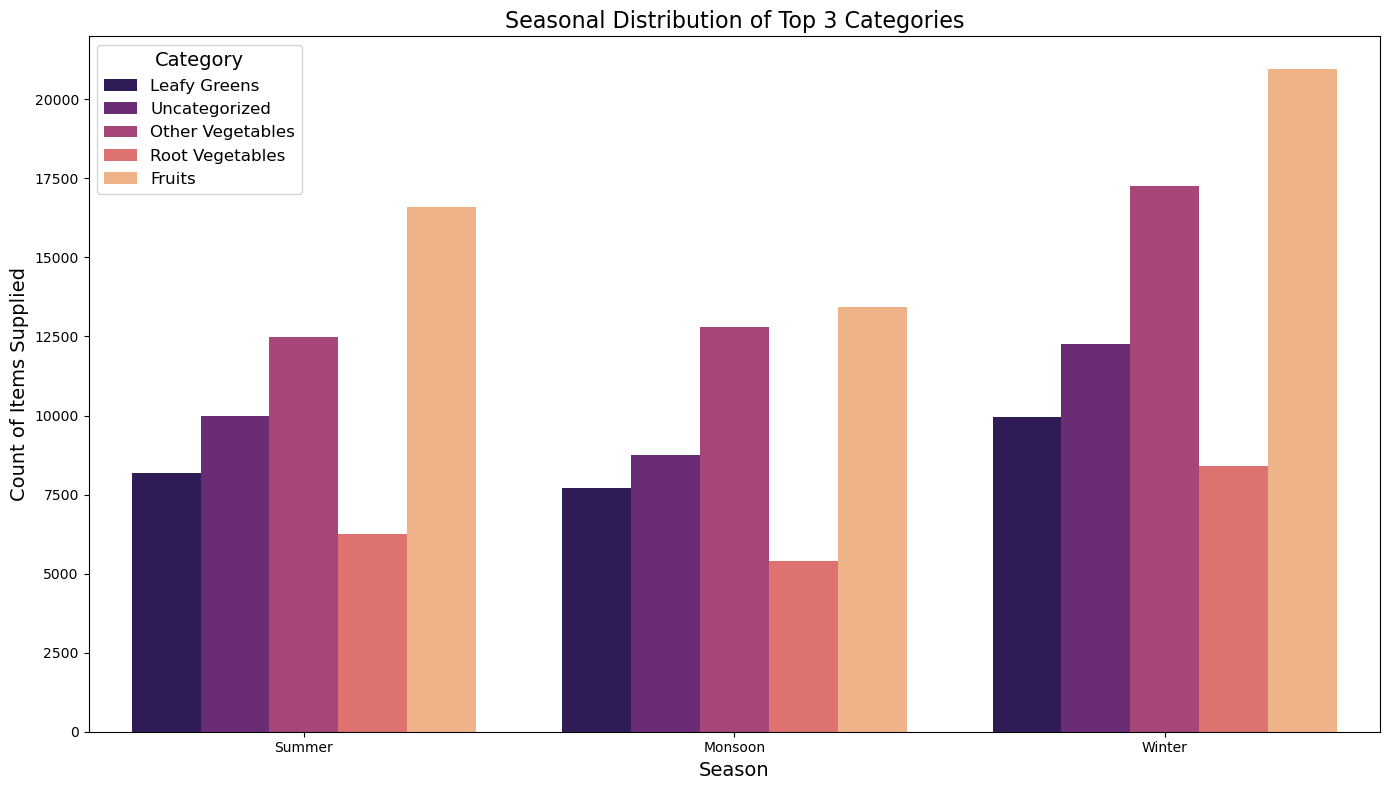

<Figure size 640x480 with 0 Axes>

In [42]:
merged_data.columns = merged_data.columns.str.strip()

# Ensure the 'Date' column exists (replace 'Date' with the correct column name if necessary)
merged_data['Month'] = pd.to_datetime(merged_data['Arrival_Date']).dt.month

# Map months to seasons
season_map = {
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon',
    9: 'Winter', 10: 'Winter', 11: 'Winter', 12: 'Winter'
}
merged_data['Season'] = merged_data['Month'].map(season_map)

# Group by category to get the total count of items per category
category_counts = merged_data.groupby('Category').size().reset_index(name='Total_Count')

# Identify the top 3 categories by total count
top_categories = category_counts.nlargest(5, 'Total_Count')['Category']

# Filter the merged_data to include only the top 3 categories
filtered_data = merged_data[merged_data['Category'].isin(top_categories)]

# Create a countplot for seasonal distribution of top categories
plt.figure(figsize=(14, 8))
sns.countplot(
    data=filtered_data,
    x='Season',
    hue='Category',
    palette='magma'
)

# Adding title and labels
plt.title('Seasonal Distribution of Top 3 Categories', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count of Items Supplied', fontsize=14)
plt.legend(title='Category', fontsize=12, title_fontsize=14, loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


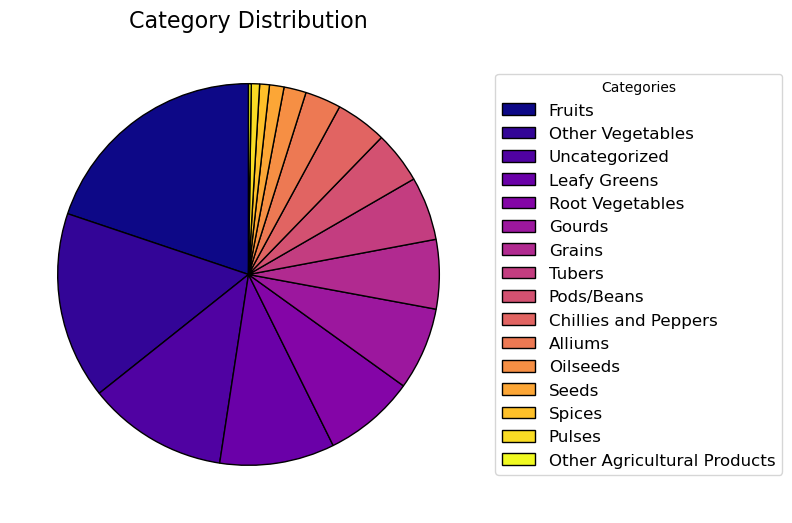

<Figure size 640x480 with 0 Axes>

In [43]:
# Group by category and calculate the count
category_counts = merged_data['Category'].value_counts()

# Define a color map
colors = plt.cm.plasma(np.linspace(0, 1, len(category_counts)))

# Define explode array (no explosion)
explode = [0] * len(category_counts)  # No explosion for any slice

# Plotting the pie chart without labels or percentages
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the pie chart without any text inside or labels
ax.pie(
    category_counts, 
    colors=colors,               # Color map
    startangle=90,               # Start angle
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Black edge for each slice
    labels=None,                   # No labels inside
    explode=explode              # No explode effect
)

# Adding the legend
plt.legend(
    category_counts.index,  # Categories to display in the legend
    title="Categories",      # Title of the legend
    loc="center left",       # Position of the legend
    bbox_to_anchor=(1, 0, 0.5, 1),  # Place the legend outside
    fontsize=12
)

# Set title
plt.title('Category Distribution', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()
